In [1]:
import cv2
import os
import numpy as np
import time
import math
import apriltag
import pyrealsense2 as rs
from realworld_func.class_motionhelper import tracker, timer
from utils_real import *
from utils_track import tps_trans, get_tps_mat

In [2]:
Hz = 20

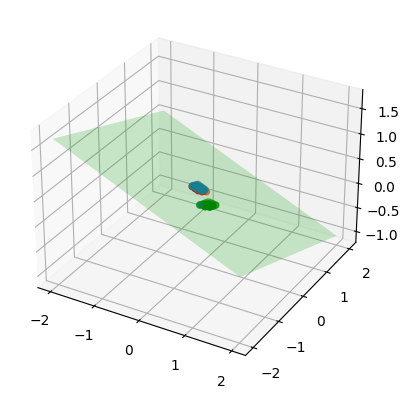

[[ 7.32988212e-07  1.38838985e-07]
 [-1.35282767e-06  5.75481032e-08]
 [ 7.50808294e-06 -1.18840717e-06]
 [-8.60075397e-06  1.20916343e-06]
 [-6.78428876e-07 -9.54103001e-08]
 [-5.12454790e-07  1.43604495e-07]
 [-3.12550333e-06  4.07955611e-07]
 [ 7.53428139e-06 -9.63743105e-07]
 [ 2.30545893e-07  2.14416531e-07]
 [ 5.40727683e-07 -1.33426838e-07]
 [-6.40984808e-07  3.15302842e-08]
 [-1.42854731e-06  2.51236827e-07]
 [-6.35383401e-07  3.57566385e-08]
 [ 1.49464100e-07 -1.06413246e-07]
 [-3.40578936e-07 -5.45092114e-08]
 [ 6.19372372e-07  5.18590824e-08]
 [ 8.85417521e-01  9.88602340e-02]
 [-6.42837142e-04 -5.03934280e-04]
 [-1.74652450e-04  1.21536599e-04]]


In [3]:
tps_coef = get_tps_mat()
print(tps_coef)

In [4]:
publish_xy(tps_coef, 50, 120, LOG_INFO = True, VERBOSE = True)

TIMER WITH [50]HZ INITIALIZED. MAX_SEC IS [120.0sec].
[INFO] [1665043207.202681]: 0.06859670620688232 -0.14277209058722806
[INFO] [1665043207.284807]: 0.07649844726219718 -0.125821821433453
[INFO] [1665043207.359351]: 0.0726125466608396 -0.124381794940714
[INFO] [1665043207.443475]: 0.0705883500590117 -0.12493366349908874
[INFO] [1665043207.524832]: 0.07095716108596178 -0.1256897983677222
[INFO] [1665043207.602011]: 0.07003674068057175 -0.1266267558154509
[INFO] [1665043207.682190]: 0.06911539066969169 -0.12756291001794795
[INFO] [1665043207.762287]: 0.07317147940960722 -0.12648834405912246
[INFO] [1665043207.864361]: 0.07595110151709916 -0.12754585603198054
[INFO] [1665043207.945183]: 0.07465422217949103 -0.127690281616598
[INFO] [1665043208.024521]: 0.07502060364891841 -0.12654210491869544
[INFO] [1665043208.106400]: 0.0737263191094113 -0.12669492710986563
[INFO] [1665043208.193902]: 0.07335471789192693 -0.12591822546036502
[INFO] [1665043208.280149]: 0.07317147940960722 -0.126488344

In [ ]:
#arduino_ide >> open imu_read.ino

#cd ~/Desktop/Project/snap
#python3 arduino_serial.py